# Numerical tools

## Objectives
* Learn how to use numpy's arrays
* Learn how to maninipulate arrays without loops
* Learn about broadcasting

See <https://docs.scipy.org/doc/numpy/user/quickstart.html> for similar material.

## Python Syntax break
### Tuple (iterable) unpacking

If you have a comma separated set of values to the left of an equals sign, Python unpacks an iterable into it. You get an error if the lengths don't match exactly. You can also use `*items` to capture the rest of the items as a list.

In [1]:
(a,) = [1]
c, d = [1, 2]
begin, *middle, end = range(5)

In [2]:
print(a)
print(begin)
print(middle)

1
0
[1, 2, 3]


Numpy arrays are iterable, so we'll use this a few times in the upcoming material. You may also have seen it in my tests, since it's a handy way to get values from an iterable while also enforcing the length. This is also the basis for the swap idiom in Python:

In [3]:
c, d = d, c

## Numpy

Numpy is the most important numerical library available for Python. Several pieces of Python syntax were added explicitly to support Numpy, such as the Ellipsis and the matrix multiplication operator.

The most common way to import numpy is as follows:

In [4]:
import numpy as np

### Arrays

The numpy library is build around the array. Arrays are different from Python lists:
* Arrays can be multidimensional, and have a `.shape`
* Arrays hold a specific data type (called `dtype`) only
* Arrays cannot change size inplace (but can change shape)
* Operations are element-wise

> If you have used Matlab before, note that arrays in Python support 0 and 1 dimensions besides the normal 2+, and that operations are elementwise.

Arrays can be created from lists and tuples (not all iterables, though - Numpy looks explicitly for nested lists and tuples to make multiple dimensions)

In [5]:
arr = np.array([1, 2, 3, 4])
arr

array([1, 2, 3, 4])

The shape of an array is a tuple, with one element per dimension

In [6]:
arr.shape

(4,)

You can also access the dtype (type of the data):

In [7]:
arr.dtype

dtype('int64')

Numpy tries to pick the best dtype based on your input data; it will pick int if there are no floats:

In [8]:
print(np.array([1, 1]).dtype)
print(np.array([1, 1.0]).dtype)
print(np.array([1, 1], dtype=np.float64).dtype)

int64
float64
float64


The good news: dtype is automatically upgraded if needed unless you are doing in-place operations

Operations on an array are defined as elementwise (with the exceptions of the logic operators - numpy uses bitwise operators instead).

In [9]:
arr ** 2

array([ 1,  4,  9, 16])

If you want to use logic operators, use the bitwise operators instead, and lots of parenthesis:

In [10]:
(arr == 1) | (arr == 2)

array([ True,  True, False, False])

### Creating arrays

You can produce new arrays many different ways:

In [11]:
np.zeros(3)

array([0., 0., 0.])

In [12]:
np.zeros(3, dtype=np.int8)

array([0, 0, 0], dtype=int8)

In [13]:
np.ones([2, 2])

array([[1., 1.],
       [1., 1.]])

Multidiminsional arrays are supported, too. (If you know about array ordering, Numpy defaults to C order, and can do Fortran order also)

In [14]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [15]:
np.random.rand(2, 2)

array([[0.71254782, 0.69782188],
       [0.6465801 , 0.70339157]])

In [16]:
np.random.randint(2, 5, (3, 4))

array([[3, 2, 4, 4],
       [4, 2, 3, 3],
       [4, 3, 4, 2]])

### Ufuncs

Numpy also provides UFuncs; functions that apply element-wise to an array. They do so without a Python loop, making them very fast. There are also a collection of other useful functions that do things like `sum` without Python loops.

> Technically, UFuncs must produce the same size output array. Ones that produce different output array sizes are called Generalized UFuncs, but that distinction will not matter to us for now.

In [17]:
np.sin(arr)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [18]:
np.exp(arr)

array([ 2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [19]:
np.sum(arr)

10

## Reshaping

We can take an array and reshape it:

In [20]:
a = np.eye(4)
a

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [21]:
a.reshape(2, 8)

array([[1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1.]])

In [22]:
a.reshape(2, -1)

array([[1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1.]])

In [23]:
a.reshape(1, 16)

array([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [24]:
a.reshape(16)

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

In [25]:
a.flatten()

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.])

We can also add new empty axis:

In [26]:
b = np.array([1, 2, 3])
b[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [27]:
b[np.newaxis, :]

array([[1, 2, 3]])

## Data types

* int: 8 (char), 16 (short), 32 (int), 64 (long) bits - optionally unsigned
* float: 16 (half), 32 (float), 64 (double) bits
* bool: Generally 8 bits for performance reasons

In [28]:
np.uint8(1)

1

In [29]:
np.float16(12.123456789123456789123456789)

12.125

## Indexing

Numpy provides very rich indexing tools. Let's see a few.

In [30]:
arr = np.arange(16).reshape(4, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

Unlike matlab, a single index returns a row (or the remaining N-1 dimensions):

In [31]:
arr[0]

array([0, 1, 2, 3])

You could nest calls (`arr[0][0]`), but Numpy uses Python's rich index support to make this simpler and faster:

In [32]:
arr[0, 0]

0

Slices are supported:

In [33]:
arr[:, 0]

array([ 0,  4,  8, 12])

Just like normal Python, a slice retains a dimension, while a single number does not.

Unless you work with large numbers of dimensions, this probably won't be useful, but `...` means "all the remaining dimensions":

* This is rarely used
* This was actually added to Python at Numpy's request
* This may be the only time in the course I get to use the `...` for what it was intended for!

In [34]:
arr[..., 0]

array([ 0,  4,  8, 12])

Boolean arrays also can index! (You can also uses lists, like I am doing in this example - but usually you will use a np.array, and it does *not* work with tuples)

In [35]:
np.arange(4)[[True, False, True, False]]

array([0, 2])

More realistic example: (note that due to the selection, output is always 1D)

In [36]:
arr[arr < 8]

array([0, 1, 2, 3, 4, 5, 6, 7])

Remember that `arr[...] = ` was one of the (few) allowed assignment expressions!

In [37]:
arr[arr < 8] = 1

In [38]:
arr

array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

Remember I told you assignment operations were special? What do you think this might do? And why did I try adding the `[:]`?

In [39]:
b = arr[arr < 8]
b[:] = 2
arr

array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

The expression `a[...] = b` turns into

```python
a.__setitem__(..., b)
```

While `a = b` unceremoniously replaces `b`, no methods called. And, for `b = a[...]`, `a.__getitem__(...)` is called.

<font color="grey">

> Note for the curious: the stuff in the `...` part gets turned into a tuple, unless it already is one. This is why tuples behave different than lists in indexing.

</font>

### Broadcasting

If you try to perform an operation, and a dimension is incompatible, if one of the incompatible values is length 1, it is replicated as necessary!

In [40]:
a = np.arange(4).reshape(2, 2)
b = np.array([1, 2])[:, np.newaxis]
print(a)
print(b)
print(a * b)

[[0 1]
 [2 3]]
[[1]
 [2]]
[[0 1]
 [4 6]]


Suggestion: don't try to mix arrays that don't have matching dimension: broadcasting is not clear in intent there. The one exception: scalars (0D)

In [41]:
a + 2

array([[2, 3],
       [4, 5]])

#### Comparison: meshgrid with and without broadcasting

In [42]:
x, y = np.mgrid[:3, :3]
# np.meshgrid(np.arange(3), np.arange(3))
x * 2 + y

array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6]])

In [43]:
x, y = np.ogrid[:3, :3]
x * 2 + y

array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6]])

# Example: The Mandelbrot set

This example is a famous fractal. It is quite simple to construct, but can be quite beautiful. The algorithm is:

Make a grid of complex values. Compute the value

$$
z_{n+1}=z_{n}^{2}+c
$$


While $z_n$ is bounded, save that iteration number.

We start by setting up the data:

In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Size of the grid to evaluate on
size = (500, 500)
xs = np.linspace(-2, 2, size[0])
ys = np.linspace(-2, 2, size[1])

In [46]:
# We need to make a grid where values x = real and y = imag
x, y = np.meshgrid(xs, ys)
# We could also write: x, y = np.mgrid[-2:2:100j, -2:2:100j]
# Or use open grids and broadcasting
c = x + y * 1j

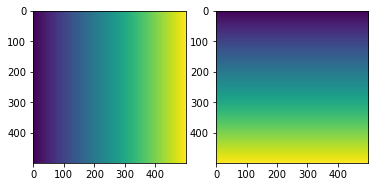

In [47]:
# Verify that we have correctly constructed the real and imaginary parts
fig, axs = plt.subplots(1, 2)
axs[0].imshow(c.real)
axs[1].imshow(c.imag)

In [48]:
z = np.zeros(size, dtype=np.complex)
it_matrix = np.zeros(size, dtype=np.int)
for n in range(30):
    z = z ** 2 + c
    it_matrix[np.abs(z) < 2] = n

/usr/share/miniconda/envs/compclass/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/share/miniconda/envs/compclass/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in square
  after removing the cwd from sys.path.
/usr/share/miniconda/envs/compclass/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in absolute
  """
/usr/share/miniconda/envs/compclass/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


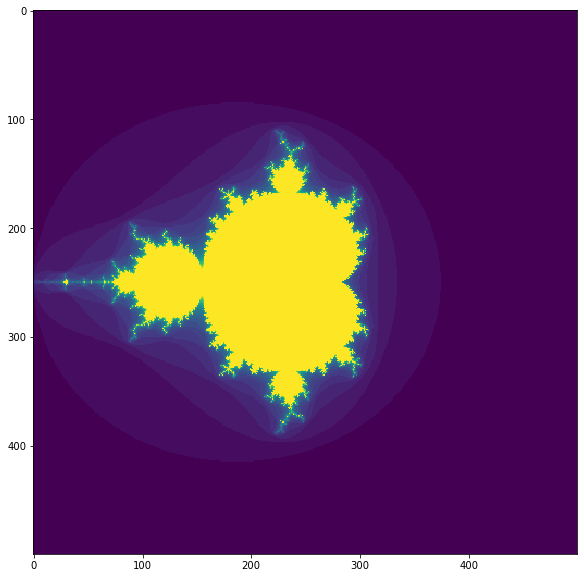

In [49]:
plt.figure(figsize=(10, 10))
plt.imshow(it_matrix)

### Continiously colored version

Let's rewrite this to continiously color the figure by the value when it diverged. We'll also be a bit more clever about avoiding warnings from numpy.

In [50]:
z = np.zeros(size, dtype=np.complex)
it_matrix = np.zeros(size, dtype=np.double)
for n in range(50):
    z[it_matrix == 0] = z[it_matrix == 0] ** 2 + c[it_matrix == 0]
    filt = (it_matrix == 0) & (np.abs(z) > 2)
    it_matrix[filt] = n + 1 - np.log(np.log(np.abs(z[filt]))) / np.log(2)

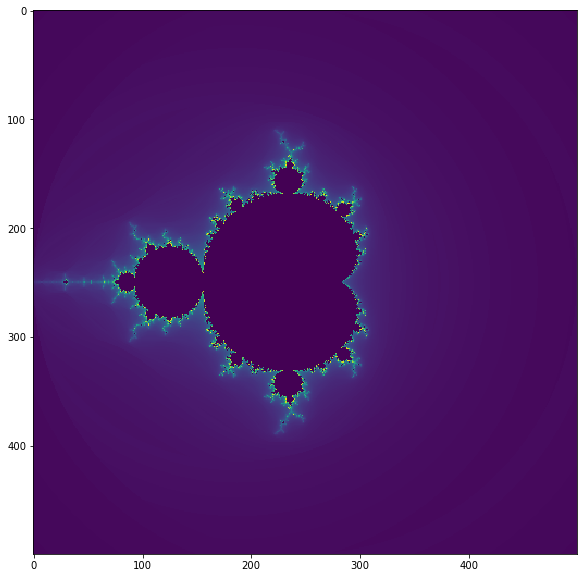

In [51]:
plt.figure(figsize=(10, 10))
plt.imshow(it_matrix)

### Try it yourself:

* Put together a function that computes the mandelbrot set. Make at least the size a default parameter.
* Adjust parameters to see the effect


See also https://www.ibm.com/developerworks/community/blogs/jfp/entry/How_To_Compute_Mandelbrodt_Set_Quickly?lang=en
for way too many ways to do mandelbrots in Python, along with performance measurements.